Import Library

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Load Data

In [132]:
df_bank = pd.read_csv('bank-additional-full.csv', sep = ';')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [133]:
# Untuk menampilkan lima baris pertama dari DataFrame
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [134]:
# Untuk menampilkan lima baris terakhir dari DataFrame
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [135]:
# Digunakan untuk mengetahui jumlah baris dan kolom dalam DataFrame
df_bank.shape

(41188, 21)

In [136]:
# Digunakan untuk menghasilkan ringkasan statistik dari DataFrame
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [137]:
# Untuk melihat informasi tentang DataFrame
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [138]:
# digunakan untuk menghitung jumlah nilai null (atau missing values) dalam setiap kolom dari dataframe 'df_bank'.
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [139]:
# Mengecek data yang duplikat
df_bank.duplicated().sum()

12

Data Cleaning

In [140]:
# menghapus baris-baris dalam DataFrame df_bank yang memiliki data yang sama atau duplikat.
df_bank.drop_duplicates(inplace=True)

# untuk menghitung jumlah baris yang duplikat dalam DataFrame df_NYC.
df_bank.duplicated().sum()

0

In [141]:
# Mendapatkan daftar kolom dalam dataset
kolom_dataset = df_bank.columns

# Loop melalui setiap kolom
for kolom in kolom_dataset:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_values = df_bank[kolom].sort_values().unique()
    print(f"Kolom: {kolom}")
    print(unique_values)
    print("\n")

Kolom: age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]


Kolom: job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


Kolom: marital
['divorced' 'married' 'single' 'unknown']


Kolom: education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


Kolom: default
['no' 'unknown' 'yes']


Kolom: housing
['no' 'unknown' 'yes']


Kolom: loan
['no' 'unknown' 'yes']


Kolom: contact
['cellular' 'telephone']


Kolom: month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


Kolom: day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']


Kolom: duration
[   0    1    2 ... 3785 4199 4918]


Kolom: campaign
[ 1  2  3  4  5  6  7  8  9 10 11 

In [142]:
# Menghitung jumlah data 'unknown' dalam setiap kolom
unknown_counts = df_bank.eq('unknown').sum()

# Menampilkan hasil perhitungan
print(unknown_counts)

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Kolom dengan data 'unknown' terbanyak adalah kolom 'education' yaitu sebanyak 1731.

In [143]:
# ubah nilai 'unknown' menjadi nilai nan
df_bank.replace('unknown', np.nan, inplace=True)

In [144]:
# mengetahui jumlah data null
print(df_bank.isnull().sum())

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [145]:
# Menghapus baris dengan nilai NaN dari dataset
df_bank = df_bank.dropna()

In [146]:
# Menampilkan jumlah data null
null_counts_after = df_bank.isnull().sum()

print(null_counts_after)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [147]:
# Menentukan kolom-kolom yang akan dilakukan label encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Melakukan label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_bank[col] = label_encoder.fit_transform(df_bank[col])

# Menampilkan hasil
df_bank.head()

<ipython-input-147-60c0be7a469d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank[col] = label_encoder.fit_transform(df_bank[col])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


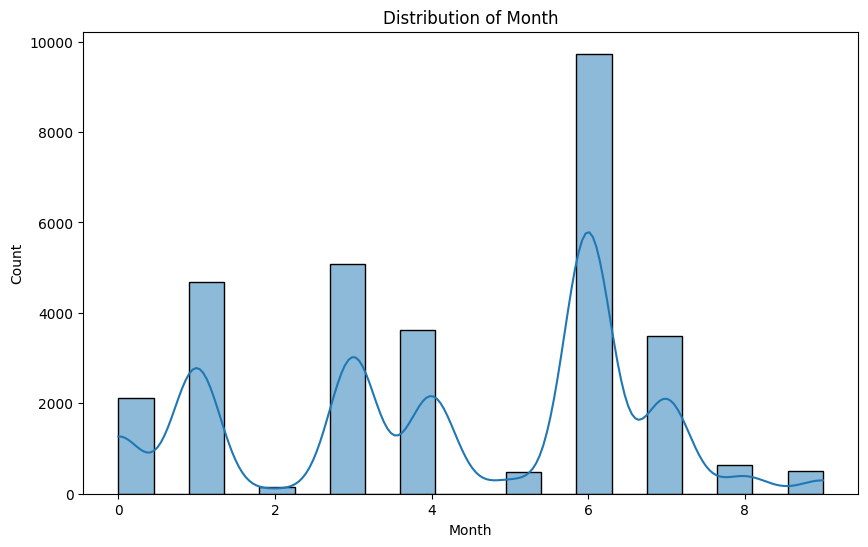

In [224]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_bank, x='month', bins=20, kde=True)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Pada plot diatas nilai terbanyak pada kolom month terdapat pada bulan mei

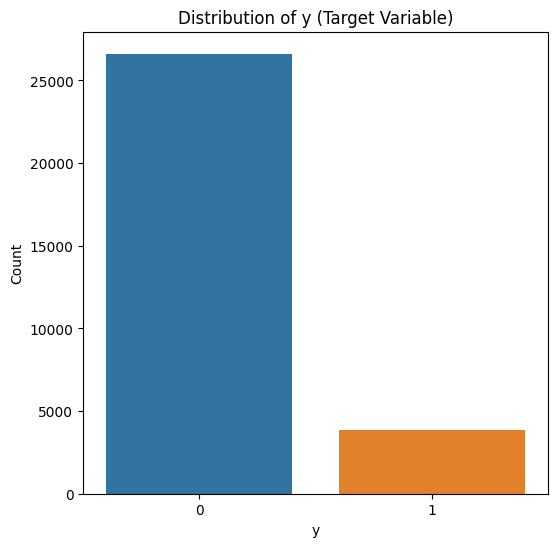

In [220]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_bank, x='y')
plt.title('Distribution of y (Target Variable)')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

Pada plot diatas terdapat nilai no lebih banyak dibandingkan dengan nilai yes pada kolom y

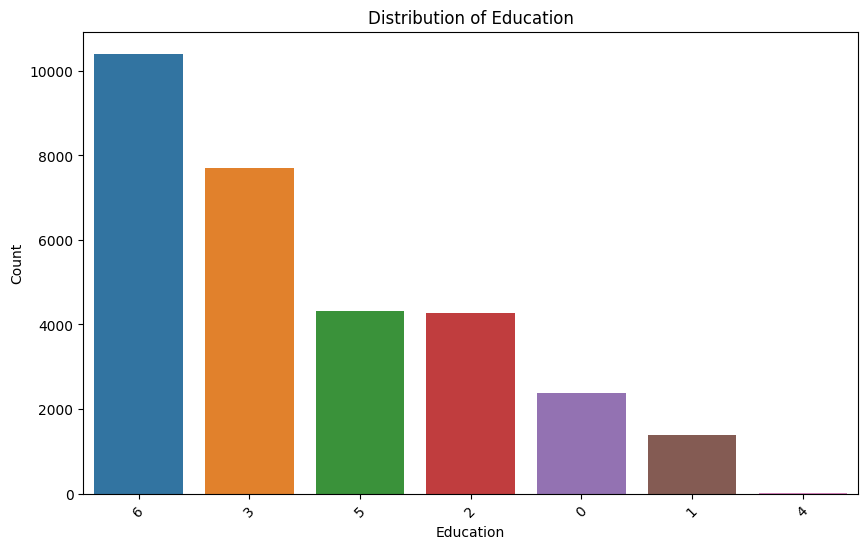

In [219]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bank, x='education', order=df_bank['education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Pada plot diatas untuk kolom education terbanyak terdapat pada university.degree dan terendah terdapat pada basic.6y

**Logistic Regression**

In [148]:
features = ['age', 'duration']

In [149]:
# Memisahkan fitur (X) dan target (y)
X = df_bank[features]
y = df_bank['y']

In [150]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [151]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Scale Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

LogisticRegression()

In [154]:
y_pred = model_logreg.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score

print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.7240796393688955


Evaluate the Model

In [156]:
# Kita bisa mendapatkan akurasi dengan .score():
model_logreg.score(X_train, y_train)

0.7116829451540195

In [157]:
model_logreg.score(X_test, y_test)

0.7240796393688955

In [158]:
# Kita bisa mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[4359,  954],
       [1984, 3351]])

In [159]:
# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      5313
           1       0.78      0.63      0.70      5335

    accuracy                           0.72     10648
   macro avg       0.73      0.72      0.72     10648
weighted avg       0.73      0.72      0.72     10648



**Presisi (Precision):**


*   Untuk kelas 0 (no): Model memiliki presisi sekitar 0.69, yang berarti sekitar 69% dari prediksi kelas 0 benar (true negatives), sementara sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik untuk mengidentifikasi kelas 0, tetapi masih ada beberapa false positives.
*   Untuk kelas 1 (yes): Model memiliki presisi sekitar 0.78, yang berarti sekitar 78% dari prediksi kelas 1 benar (true positives), sementara sisanya adalah false negatives. Ini mengindikasikan model memiliki kemampuan yang baik untuk mengidentifikasi kelas 1.

**Recall:**


*   Untuk kelas 0 (no): Model memiliki recall sekitar 0.82, yang berarti sekitar 82% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi baik tentang kemampuan model dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki recall sekitar 0.63, yang berarti sekitar 63% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mungkin mengindikasikan beberapa contoh positif yang tidak diidentifikasi oleh model.

**F1-score:**


*   F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.72, yang menunjukkan seimbang antara precision dan recall.
*   F1-score yang baik untuk dataset yang tidak seimbang.

**Akurasi (Accuracy):**


*   Akurasi keseluruhan model sekitar 0.72, yang menunjukkan sekitar 72% dari prediksi benar secara keseluruhan. Ini adalah metrik yang memberikan gambaran umum tentang performa model, tetapi bisa menjadi bias dalam kasus ketidakseimbangan kelas.










**K-Nearest Neighbor (KNN)**

In [160]:
features = ['age', 'campaign']

In [161]:
# Memisahkan fitur (X) dan target (y)
X = df_bank[features]
y = df_bank['y']

In [162]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [163]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Generating Model for K=5

Mari kita buat model pengklasifikasi KNN untuk k = 5.

In [164]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Model Evaluation for k=5

Mari kita perkirakan, seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar.

Akurasi dapat dihitung dengan membandingkan actual test set values dan predicted values.



In [165]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5584147257700977


Re-generating Model for K=7

Mari kita buat model pengklasifikasi KNN untuk k = 7.

In [166]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Mari kita estimasi lagi, seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar untuk k = 7.

In [167]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5617017280240421


In [168]:
# Kita bisa mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[3043, 2270],
       [2397, 2938]])

In [169]:
# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57      5313
           1       0.56      0.55      0.56      5335

    accuracy                           0.56     10648
   macro avg       0.56      0.56      0.56     10648
weighted avg       0.56      0.56      0.56     10648



**Presisi (Precision):**


*   Untuk kelas 0 (no): Model memiliki presisi sekitar 0.56, yang berarti sekitar 56% dari prediksi kelas 0 adalah benar (true negatives), sedangkan sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik untuk mengidentifikasi kelas 0, tetapi masih ada beberapa false positives.
*   Untuk kelas 1 (yes): Model juga memiliki presisi sekitar 0.56, yang berarti sekitar 56% dari prediksi kelas 1 adalah benar (true positives), sedangkan sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik untuk mengidentifikasi kelas 1.

**Recall:**


*   Untuk kelas 0 (no): Model memiliki recall sekitar 0.57, yang berarti sekitar 57% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (positif): Model memiliki recall sekitar 0.55, yang berarti sekitar 55% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mungkin mengindikasikan beberapa contoh positif yang tidak diidentifikasi oleh model.

**F1-score:**


*   F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.56, yang menunjukkan seimbang antara precision dan recall.

**Akurasi (Accuracy):**


*   Akurasi keseluruhan model sekitar 0.56, yang menunjukkan sekitar 56% dari prediksi benar secara keseluruhan. Ini adalah metrik yang memberikan gambaran umum tentang performa model.










Di sini, kita telah meningkatkan jumlah tetangga dalam model dan akurasi meningkat. Tapi, ini tidak perlu untuk setiap kasus dimana peningkatan banyak tetangga meningkatkan akurasi.

Sekarang saatnya improve model dan mencari tahu nilai k yang optimal.

In [170]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

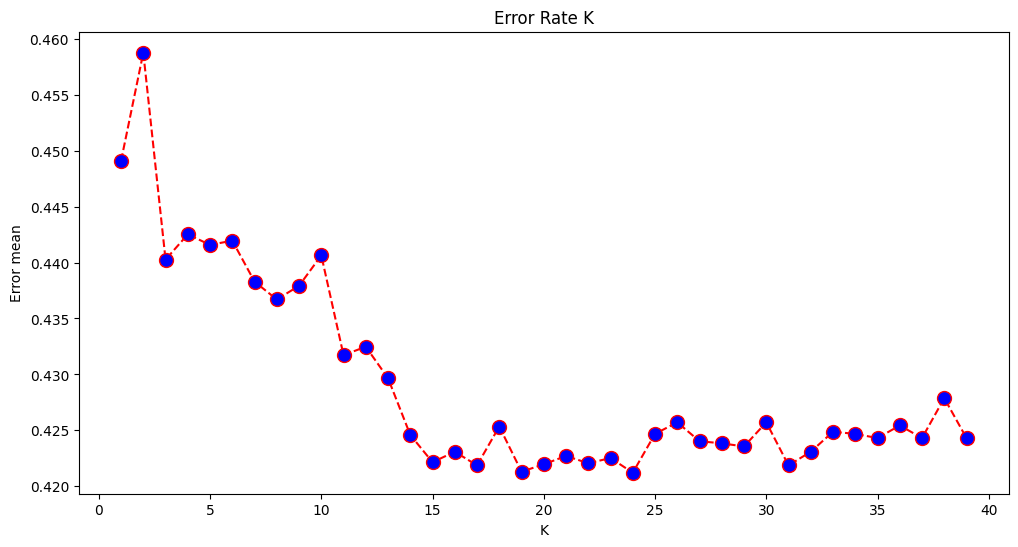

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [172]:
error_rate_at_k2 = error[1]  # Indeks 1 karena indeks dimulai dari 0, sehingga K=2 memiliki indeks 1.
print(f"Error Rate at K=2: {error_rate_at_k2}")

Error Rate at K=2: 0.45877160030052594


Dari plot tersebut terlihat bahwa error terbesar yang kita dapatkan adalah 0.45877160030052594 pada K = 2.

**Support Vector Machine**

In [173]:
features = ['age', 'month']

In [174]:
# Memisahkan fitur (X) dan target (y)
X = df_bank[features]
y = df_bank['y']

In [175]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [176]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Generating Model

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluating the Model**

Akurasi dapat dihitung dengan membandingkan nilai set test aktual dan nilai prediksi.

In [178]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5419797145003756


In [179]:
# Kita bisa mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[4445,  868],
       [4009, 1326]])

In [180]:
# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65      5313
           1       0.60      0.25      0.35      5335

    accuracy                           0.54     10648
   macro avg       0.57      0.54      0.50     10648
weighted avg       0.57      0.54      0.50     10648



**Presisi (Precision):**


*   Untuk kelas 0 (no): Model memiliki presisi sekitar 0.53, yang berarti sekitar 53% dari prediksi kelas 0 adalah benar (true negatives), sementara sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 1 adalah benar (true positives), sementara sisanya adalah false positives. Ini menunjukkan kemampuan model yang lebih baik dalam mengidentifikasi kelas 1.

**Recall:**


*   Untuk kelas 0 (no): Model memiliki recall sekitar 0.84, yang berarti sekitar 84% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki recall sekitar 0.25, yang berarti sekitar 25% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mengindikasikan bahwa model kesulitan dalam mengidentifikasi kelas 1.

**F1-score:**


*   F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.50, yang menunjukkan adanya trade-off antara precision dan recall.

**Akurasi (Accuracy):**


*   Akurasi keseluruhan model sekitar 0.54, yang menunjukkan sekitar 54% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.









Untuk evaluasi lebih lanjut, kita juga dapat memeriksa precision dan recall model.

In [181]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.6043755697356427
Recall: 0.24854732895970008


**Decision Tree**

In [182]:
features = ['age', 'job']

In [183]:
# Memisahkan fitur (X) dan target (y)
X = df_bank[features]
y = df_bank['y']

In [184]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [185]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# import tree model
from sklearn import tree

# create a tree model
dt = tree.DecisionTreeClassifier()

# Train the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [187]:
#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [188]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6049023290758828


In [189]:
# Kita bisa mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[3439, 1874],
       [2333, 3002]])

In [190]:
# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      5313
           1       0.62      0.56      0.59      5335

    accuracy                           0.60     10648
   macro avg       0.61      0.60      0.60     10648
weighted avg       0.61      0.60      0.60     10648



**Presisi (Precision):**


*   Untuk kelas 0 (no): Model memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 0 adalah benar (true negatives), sementara sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model juga memiliki presisi sekitar 0.62, yang berarti sekitar 62% dari prediksi kelas 1 adalah benar (true positives), sementara sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik dalam mengidentifikasi kelas 1.

**Recall:**


*   Untuk kelas 0 (no): Model memiliki recall sekitar 0.65, yang berarti sekitar 65% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki recall sekitar 0.56, yang berarti sekitar 56% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mungkin mengindikasikan beberapa contoh positif yang tidak diidentifikasi oleh model.

**F1-score:**


*   F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.60, yang menunjukkan seimbang antara precision dan recall.

**Akurasi (Accuracy):**


*   Akurasi keseluruhan model sekitar 0.60, yang menunjukkan sekitar 60% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.










**Random Forest**

In [191]:
features = ['age', 'education']

In [192]:
# Memisahkan fitur (X) dan target (y)
X = df_bank[features]
y = df_bank['y']

In [193]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [194]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest model
rf=RandomForestClassifier()

# Train the model using the training sets
rf.fit(X_train,y_train)

RandomForestClassifier()

In [196]:
#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [197]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5900638617580767


In [198]:
# Kita bisa mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[3271, 2042],
       [2323, 3012]])

In [199]:
# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      5313
           1       0.60      0.56      0.58      5335

    accuracy                           0.59     10648
   macro avg       0.59      0.59      0.59     10648
weighted avg       0.59      0.59      0.59     10648



**Presisi (Precision):**


*   Untuk kelas 0 (no): Model memiliki presisi sekitar 0.58, yang berarti sekitar 58% dari prediksi kelas 0 adalah benar (true negatives), sedangkan sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model juga memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 1 adalah benar (true positives), sedangkan sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik dalam mengidentifikasi kelas 1.

**Recall:**


*   Untuk kelas 0 (no): Model memiliki recall sekitar 0.62, yang berarti sekitar 62% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki recall sekitar 0.56, yang berarti sekitar 56% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mengindikasikan bahwa model kesulitan dalam mengidentifikasi kelas 1.

**F1-score:**


*   F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.59, yang menunjukkan seimbang antara precision dan recall.

**Akurasi (Accuracy):**

*   Akurasi keseluruhan model sekitar 0.59, yang menunjukkan sekitar 59% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.











**Naive Bayes**

In [200]:
features = ['age', 'day_of_week']

In [201]:
# Memisahkan fitur (X) dan target (y)
X = df_bank[features]
y = df_bank['y']

In [202]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [203]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# create a naive bayes model
nb=GaussianNB()

# Train the model using the training sets
nb.fit(X_train,y_train)

GaussianNB()

In [205]:
y_pred = nb.predict(X_test)

In [206]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5540007513148009


In [207]:
# Kita bisa mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[4171, 1142],
       [3607, 1728]])

In [208]:
# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64      5313
           1       0.60      0.32      0.42      5335

    accuracy                           0.55     10648
   macro avg       0.57      0.55      0.53     10648
weighted avg       0.57      0.55      0.53     10648



**Presisi (Precision):**


*   Untuk kelas 0 (no): Model memiliki presisi sekitar 0.54, yang berarti sekitar 54% dari prediksi kelas 0 adalah benar (true negatives), sedangkan sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 1 adalah benar (true positives), sedangkan sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik dalam mengidentifikasi kelas 1.

**Recall:**


*   Untuk kelas 0 (no): Model memiliki recall sekitar 0.79, yang berarti sekitar 79% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
*   Untuk kelas 1 (yes): Model memiliki recall sekitar 0.32, yang berarti sekitar 32% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mengindikasikan bahwa model kesulitan dalam mengidentifikasi kelas 1.

**F1-score:**


*   F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.53, yang menunjukkan adanya trade-off antara precision dan recall.

**Akurasi (Accuracy):**


*   Akurasi keseluruhan model sekitar 0.55, yang menunjukkan sekitar 55% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.










**Algorithm Analysis** (Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.)

Pemilihan algoritma pemodelan seperti Logistic Regression (Regresi Logistik) didasarkan pada sejumlah faktor dan pertimbangan yang mencakup sifat data, tujuan pemodelan, dan karakteristik algoritma. Berikut adalah beberapa alasan mengapa seseorang mungkin memilih Logistic Regression sebagai algoritma untuk membuat model:


1.   **Sifat Variabel Dependen (Target Variable):** Logistic Regression biasanya digunakan ketika variabel dependen (target) adalah biner atau berkategori, yaitu ketika kita ingin memprediksi probabilitas kejadian atau non-kejadian. Misalnya, dalam kasus seperti prediksi apakah pelanggan akan membeli produk (ya/tidak) atau apakah email adalah spam (spam/bukan spam).
2.   **Interpretability:** Logistic Regression adalah algoritma yang sangat interpretable. Hasil dari model dapat dengan mudah dijelaskan dalam istilah probabilitas dan pengaruh setiap fitur terhadap probabilitas kelas target. Ini membuatnya berguna dalam situasi di mana interpretasi model adalah aspek penting, seperti dalam keputusan klinis atau kebijakan.
3.   **Efisiensi Komputasi:** Logistic Regression adalah algoritma yang cepat dan membutuhkan sumber daya komputasi yang lebih rendah dibandingkan dengan beberapa algoritma yang lebih kompleks. Ini membuatnya cocok untuk data yang besar dan ketika efisiensi komputasi penting.



Pemilihan algoritma untuk membuat model machine learning sangat tergantung pada karakteristik data dan tujuan akhir yang ingin dicapai. Algoritma K-Nearest Neighbors (K-NN) adalah salah satu algoritma yang cocok dalam beberapa situasi, terutama jika karakteristik berikut ada dalam konteks Anda:


1.   **Data Berdasarkan Jarak:** K-NN adalah algoritma berbasis jarak yang bekerja dengan baik ketika data Anda dapat diukur dalam ruang metrik. Artinya, algoritma ini efektif untuk masalah klasifikasi di mana jarak antara titik data memainkan peran penting dalam pengklasifikasian.
2.   **Fleksibilitas:** K-NN adalah algoritma yang fleksibel dan dapat digunakan untuk masalah klasifikasi dan regresi. Anda dapat menyesuaikan jumlah tetangga yang digunakan (parameter "k") sesuai dengan kebutuhan Anda.
3.   **Model yang Non-parametrik:** K-NN adalah algoritma non-parametrik, yang berarti Anda tidak perlu membuat asumsi tertentu tentang distribusi data. Ini cocok untuk situasi di mana data Anda mungkin tidak mengikuti distribusi statistik tertentu.



Pemilihan algoritma untuk membuat model machine learning bergantung pada karakteristik data dan tujuan yang ingin dicapai. Algoritma Support Vector Machine (SVM) adalah pilihan yang baik dalam beberapa situasi, terutama jika karakteristik berikut ada dalam konteks Anda:

1.   **Kemampuan Klasifikasi yang Kuat:** SVM merupakan algoritma yang sangat baik dalam pemisahan kelas yang kompleks dan berhimpitan. Ini adalah pilihan yang kuat jika Anda memiliki masalah klasifikasi dengan dua kelas yang tumpang tindih dan sulit untuk dipisahkan.
2.   **Kemampuan Menangani Data Berkarakteristik Tinggi:** SVM efektif dalam menangani data yang memiliki banyak fitur (high-dimensional data). Ini membuat SVM cocok untuk berbagai bidang seperti pengenalan pola, visi komputer, dan bioinformatika di mana fitur-fitur tinggi adalah norma.
3.   **Kemampuan Kustomisasi Kernal:** SVM memungkinkan penggunaan berbagai jenis kernel (seperti linear, polinomial, dan radial basis function) yang dapat digunakan untuk mengatasi masalah yang berbeda. Ini memberi Anda fleksibilitas dalam menyesuaikan model dengan karakteristik data Anda.



Pemilihan algoritma untuk membuat model machine learning sangat tergantung pada karakteristik data dan tujuan yang ingin dicapai. Algoritma Decision Tree adalah pilihan yang baik dalam beberapa situasi, terutama jika karakteristik berikut ada dalam konteks Anda:

1.   **Kemudahan Interpretasi:** Decision Tree adalah algoritma yang sangat mudah dipahami dan diinterpretasikan. Model Decision Tree dapat direpresentasikan dalam bentuk diagram yang sederhana dan mudah dimengerti oleh manusia. Ini menjadikannya alat yang baik untuk analisis dan pengambilan keputusan yang transparan.
2.   **Kemampuan Menangani Data Campuran:** Decision Tree dapat digunakan untuk data yang memiliki campuran jenis variabel, termasuk variabel kategori (kualitatif) dan variabel numerik (kuantitatif). Algoritma ini memiliki fleksibilitas dalam menangani berbagai jenis data.
3.   **Kemampuan Identifikasi Fitur yang Penting:** Decision Tree dapat memberikan informasi tentang fitur-fitur yang paling penting dalam pengambilan keputusan. Ini dapat membantu Anda dalam pemahaman mendalam tentang kontribusi masing-masing fitur terhadap prediksi.



Pemilihan algoritma untuk membuat model machine learning harus mempertimbangkan karakteristik data dan tujuan yang ingin dicapai. Algoritma Random Forest adalah pilihan yang sangat baik dalam berbagai situasi, terutama jika karakteristik berikut ada dalam konteks Anda:

1.   **Akurasi yang Tinggi:** Random Forest adalah salah satu algoritma ensemble yang terkenal karena memberikan akurasi yang tinggi dalam berbagai jenis masalah klasifikasi dan regresi. Dengan menggabungkan prediksi dari banyak pohon keputusan (decision tree), Random Forest cenderung mengurangi overfitting dan meningkatkan akurasi.
2.   **Kemampuan Menangani Data yang Besar:** Random Forest dapat digunakan pada dataset yang besar dengan banyak fitur. Algoritma ini mampu mengatasi dimensi data yang tinggi dan data yang kompleks dengan baik.
3.   **Kemampuan Identifikasi Fitur yang Penting:** Algoritma Random Forest dapat memberikan informasi tentang fitur-fitur yang paling penting dalam pengambilan keputusan. Ini membantu Anda dalam memahami kontribusi masing-masing fitur terhadap prediksi.



Pemilihan algoritma untuk membuat model machine learning sangat tergantung pada karakteristik data dan tujuan yang ingin dicapai. Algoritma Naive Bayes adalah pilihan yang baik dalam beberapa situasi, terutama jika karakteristik berikut ada dalam konteks Anda:

1.   **Kemampuan Mengatasi Data yang Tidak Seimbang:** Naive Bayes dapat menangani masalah ketidakseimbangan kelas (class imbalance) dengan baik, terutama jika Anda menggunakan varian seperti Naive Bayes dengan distribusi Gaussian.
2.   **Kemampuan Mengatasi Data Kategorikal:** Naive Bayes bekerja dengan baik dengan data yang memiliki atribut kategorikal. Ini menjadikannya pilihan yang baik untuk masalah klasifikasi dengan variabel kategori.
3.   **Pemodelan Probabilitas:** Algoritma Naive Bayes adalah model probabilitas. Ini dapat memberikan perkiraan probabilitas hasil yang sangat berguna dalam berbagai situasi, seperti klasifikasi email spam atau deteksi penyakit.

